In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

NameError: name 'pip' is not defined

In [2]:
'''od = pd.read_csv('..\data\Clean_StockX_Data.csv')
df = od.copy()
df.head()'''
od = pd.read_csv('https://raw.githubusercontent.com/deafkojiro/Yeezy-Analysis/main/data/Clean_StockX_Data.csv')
df = od.copy()

In [3]:
df["Brand"] = pd.Categorical(df["Brand"])
df['Brand'] = df['Brand'].cat.codes

<IPython.core.display.Javascript object>


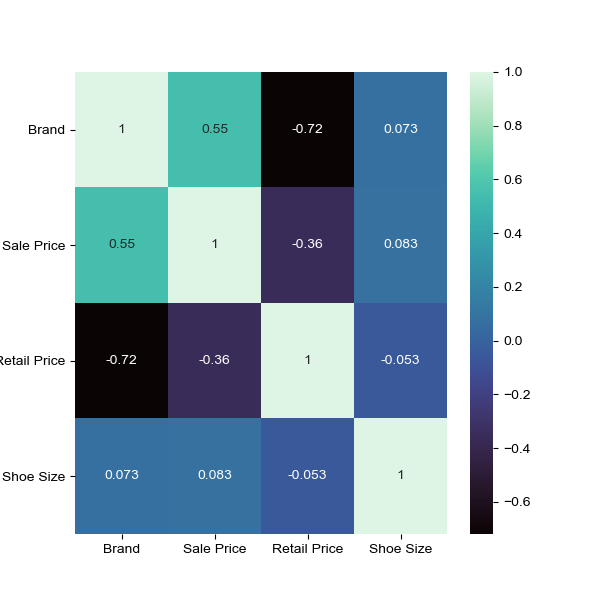

<IPython.core.display.Javascript object>


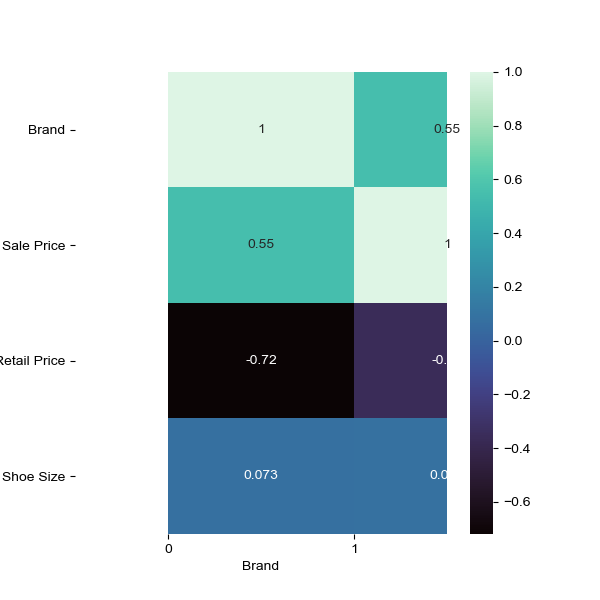

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Brand'),
  Text(0, 1.5, 'Sale Price'),
  Text(0, 2.5, 'Retail Price'),
  Text(0, 3.5, 'Shoe Size')])

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
correlations = df.corr()
sns.heatmap(correlations, annot=True, ax=ax, cmap = 'mako')
plt.yticks(rotation = 0)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
correlations = df.corr()
sns.heatmap(correlations, annot=True, ax=ax, cmap = 'mako')
plt.yticks(rotation = 0)

In [5]:
sns.boxplot(x='Brand', y='Sale Price', data=df)
plt.show()

In [6]:
#Average sale price by brand
a = []
labels = df[['Brand', 'Sale Price']]
brands = ['Yeezy', 'Off-White']
for b in brands:
    row = labels.loc[labels['Brand'] == str(b)]
    a.append(row['Sale Price'].mean())
print('Yeezy avg price: $' + str(a[0]))
print('Off-White avg price: $' + str(a[1]))

Yeezy avg price: $nan
Off-White avg price: $nan


In [7]:
X = df.iloc[:, [3,6]].values

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>


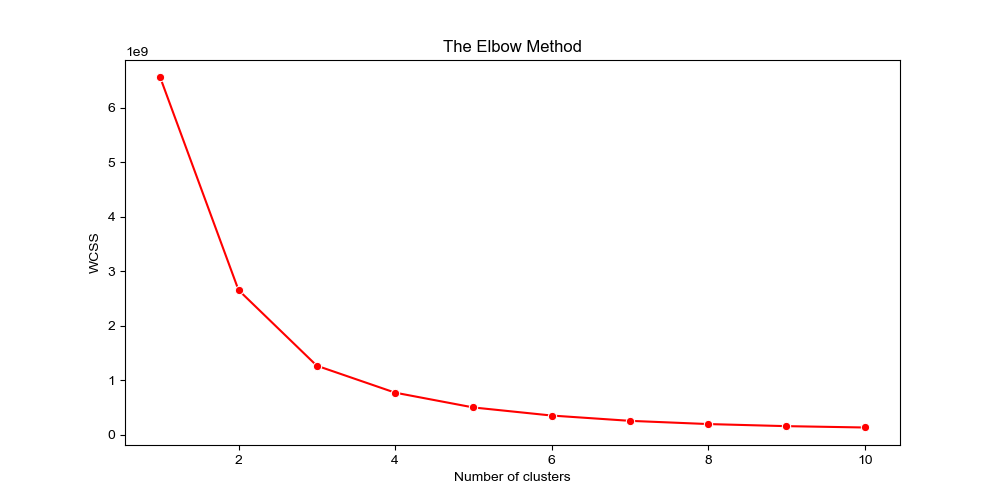

C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

<IPython.core.display.Javascript object>


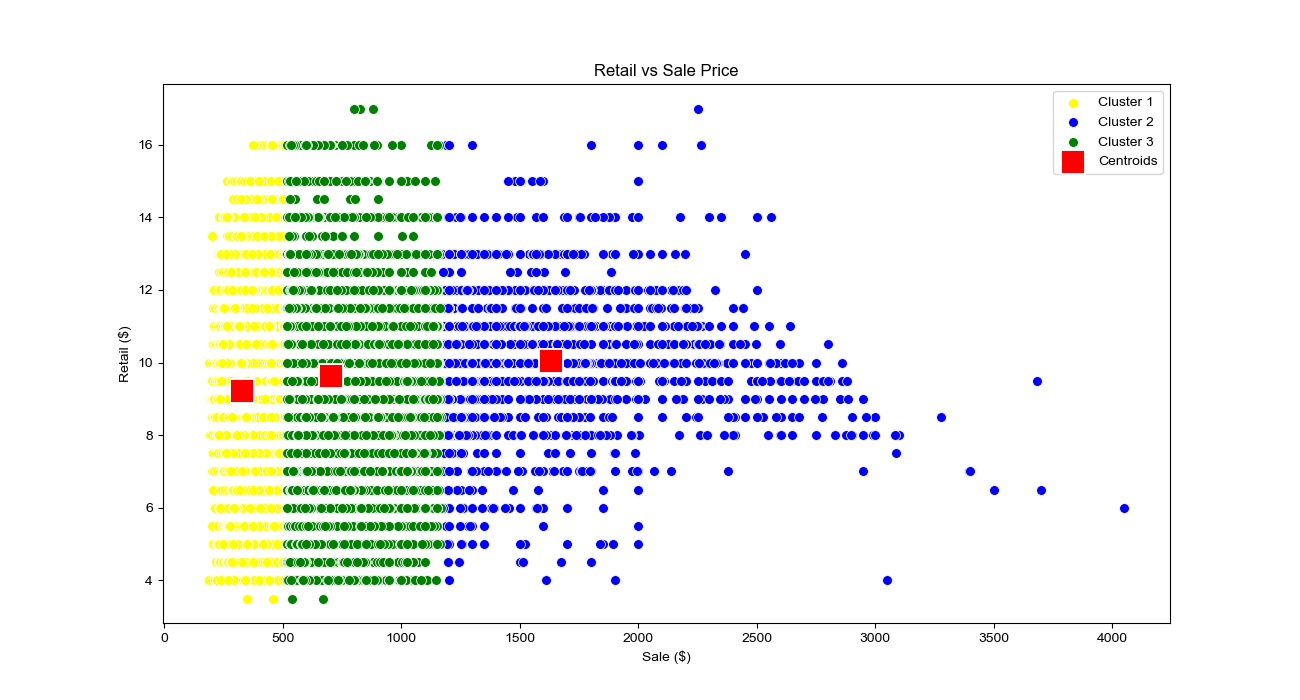

C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

In [11]:
plt.figure(figsize=(13,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Retail vs Sale Price')
plt.xlabel('Sale ($)')
plt.ylabel('Retail ($)')
plt.legend()
plt.show()

C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


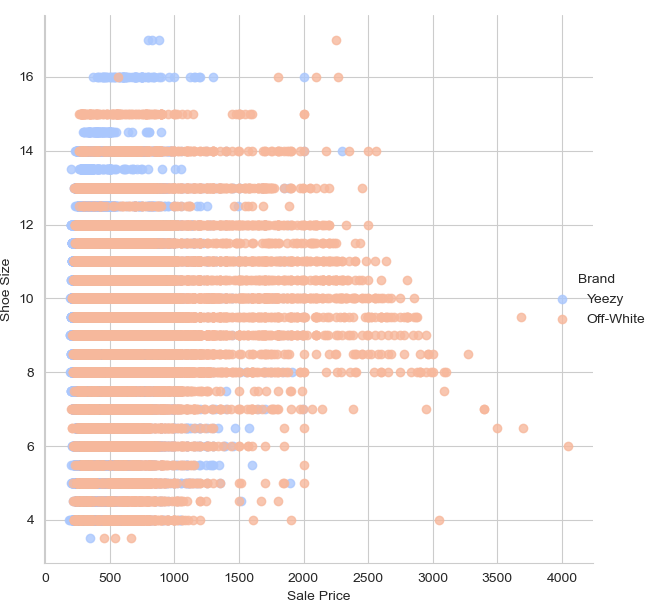

In [12]:
sns.set_style('whitegrid')
g=sns.lmplot('Sale Price','Shoe Size',data=df, hue='Brand',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)
legend = g._legend
legend.set_title("Brand")
for t, l in zip(legend.texts,("Yeezy", "Off-White")):
    t.set_text(l)